shape of X is :  (2, 400)
shape of Y :  (1, 400)
No of training examples :  400


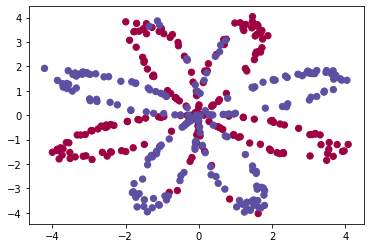

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline


X,Y = load_planar_dataset()
m = Y.shape[1]
print("shape of X is : ",X.shape)
print("shape of Y : ", Y.shape)
print("No of training examples : ",m)

#plot data
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

In [3]:
"""
N.N structure

    O
O   O    
O   O    O->OUTPUT
    O



"""

def set_layer_size(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 4
    return n_x,n_y,n_h

def initialize_parameters(n_x,n_h,n_y):
    
    np.random.seed(2)
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    
    assert(W1.shape == (n_h,n_x))
    assert(W2.shape == (n_y,n_h))
    assert(b1.shape == (n_h,1))
    assert(b2.shape == (n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    
    return parameters



def forward_propagation(X,parameters):
    
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    
    
    Z1 = np.dot(W1,X) + b1  #W1 -> (n_h,n_x) -> (4,2) ||| X -> (2,400) ||| b1 -> (4,1)
    A1 = np.tanh(Z1) #(4,400)
    Z2 = np.dot(W2,A1) + b2 #W2 -> 
    A2 = sigmoid(Z2)
    
    
        
    #print("Shape of X : ", X.shape)
    #print("Shape of Y : ", Y.shape)
    #print("Shape of W1 : ",W1.shape)
    #print("Shape of W2 : ",W2.shape)
    #print("Shape of A1 : ",A1.shape)
    #print("Shape of A2 : ",A2.shape)
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

def compute_cost(A2,Y):
    cost_a = np.dot(np.log(A2),Y.T)
    cost_b = np.dot(np.log(1-A2),(1-Y).T)
    logprob = cost_a + cost_b
    
    cost = (-1/m)*logprob
    
    return cost


def backward_propagation(parameters,cache,X,Y):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]

    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis = 1, keepdims = True)
    gdash = (1-np.power(A1,2))
    dZ1 = np.multiply(np.dot(W2.T,dZ2),gdash)
    dW1 = np.dot(dZ1,X.T)
    db1 = np.sum(dZ1,axis = 1,keepdims = True)
    
    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

def update_parameters(parameters,grads,learning_rate = 1.2):
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [4]:
def nn_model(X,Y,n_h,iterations = 10000):
    
    n_x,n_y,n_h = set_layer_size(X,Y)
    
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    for _ in range(iterations):
        
        A2,cache = forward_propagation(X,parameters)
        
        cost = compute_cost(A2,Y)
        
        grads = backward_propagation(parameters,cache,X,Y)
        
        parameters = update_parameters(parameters,grads)
        
        
    return parameters


    
    

In [5]:
def predict(X,parameters):
    A2,cache = forward_propagation(X,parameters)
    
    predictions = (A2>0.5)
    
    return predictions

In [8]:
parameters = nn_model(X,Y,4,10000)
print(parameters["W1"],parameters["W2"],parameters["b1"],parameters["b2"])
predictions = predict(X,parameters)
print("---------")
print("predictions mean = ",np.mean(predictions))
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')


[[ 109.6240242   107.60474729]
 [ -49.28854649   52.77044547]
 [   1.6935019  -215.88183216]
 [  70.06170261   31.17186371]] [[-2.78912348 -1.88012997 -2.75023278  0.55894176]] [[  7.11683009]
 [  9.3265207 ]
 [ -9.55240331]
 [-12.70983431]] [[0.2159827]]
---------
predictions mean =  0.4775
Accuracy: 87%
